<a href="https://colab.research.google.com/github/Rezamoghadam8810/Algorithmic_trading_tutorial/blob/main/Defining_an_SMA_Crossover_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("eurusd.csv",parse_dates=["Date"], index_col="Date")

In [4]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [5]:
sma_s=50
sma_l=200

In [6]:
data.price.rolling(50)

Rolling [window=50,center=False,axis=0,method=single]

In [7]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [8]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [9]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


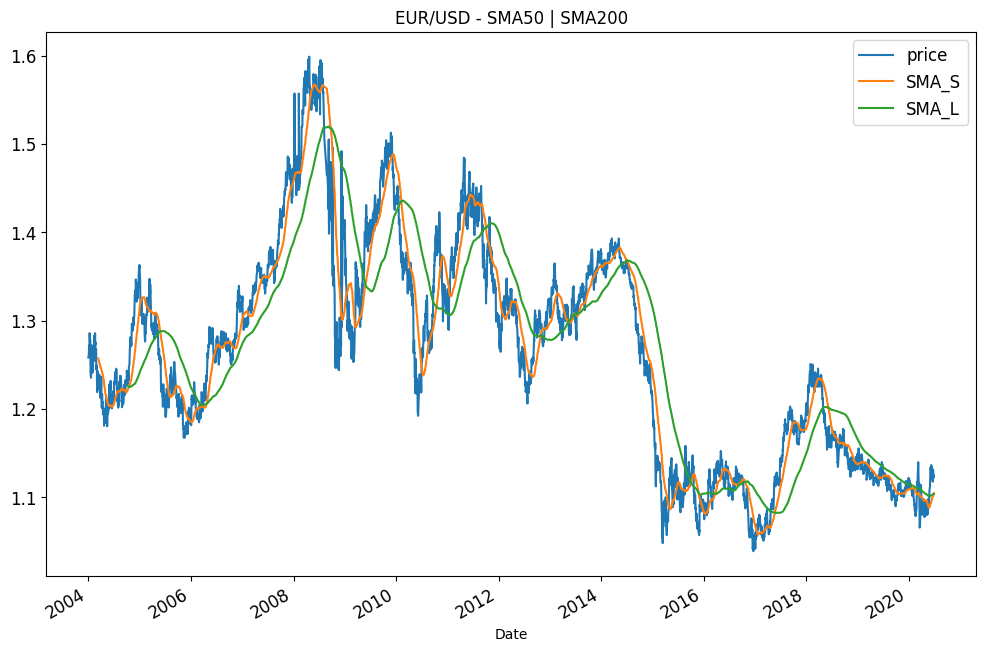

In [10]:
data.plot(figsize=(12,8),title="EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l),fontsize=12)
plt.legend(fontsize = 12)
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


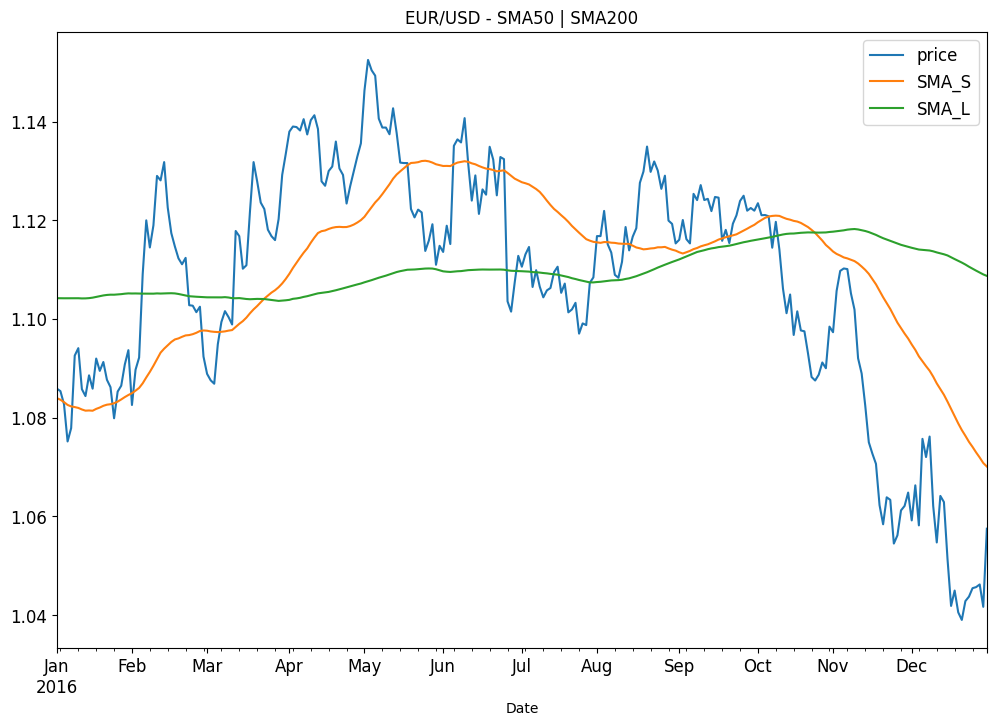

In [13]:
data.loc["2016"].plot(figsize = (12,8), title="EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [14]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"],1,-1)

In [15]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


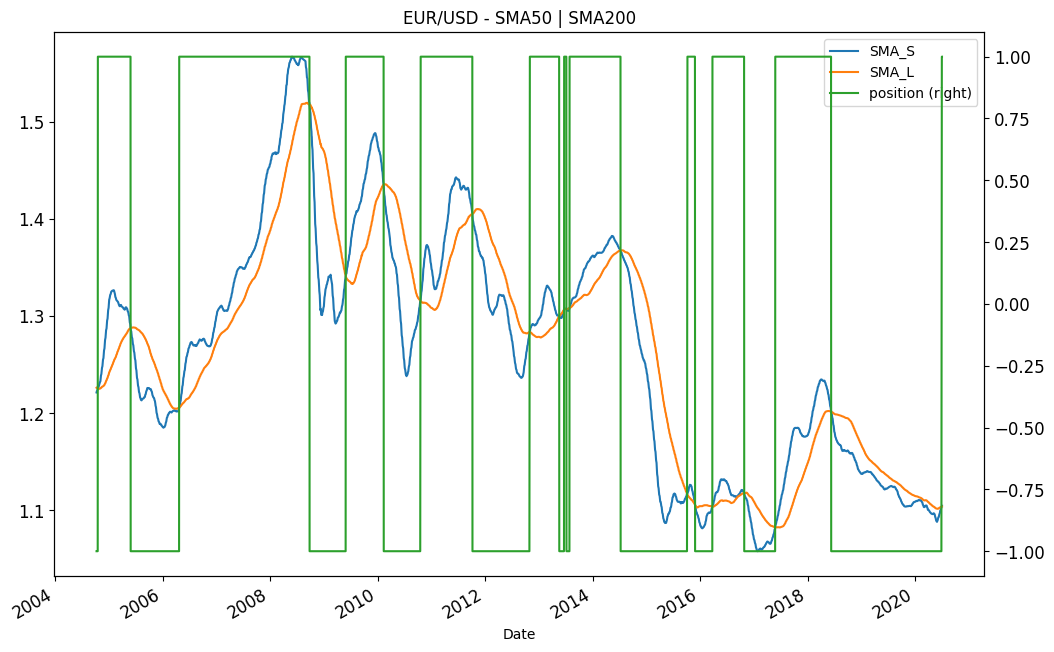

In [16]:
data.loc[:,["SMA_S","SMA_L", "position"]].plot(figsize=(12,8),fontsize=12,secondary_y="position"
                                        ,title="EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l))
plt.show()

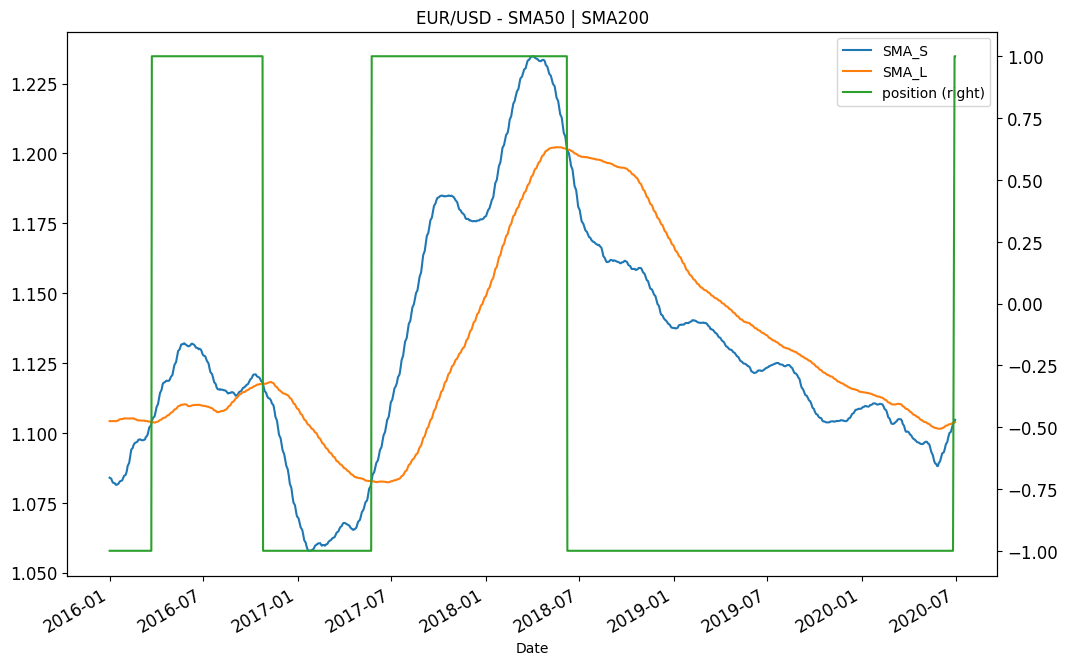

In [17]:
data.loc["2016":,["SMA_S","SMA_L", "position"]].plot(figsize=(12,8),fontsize=12,secondary_y="position"
                                        ,title="EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l))
plt.show()

# **Vectorized Strategy Backtesting**

In [18]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [19]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [20]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [21]:
data.dropna(inplace = True)

In [22]:
data[["returns","strategy"]].sum() #obsolute performance

,0
returns,-0.087929
strategy,0.249591


In [23]:
data[["returns","strategy"]].sum().apply(np.exp) # absolot performance

,0
returns,0.915826
strategy,1.283500


In [24]:
data[["returns","strategy"]].mean() * 252

,0
returns,-0.005438
strategy,0.015435


In [25]:
data[["returns","strategy"]].std() * np.sqrt(252)

,0
returns,0.120806
strategy,0.120802


In [26]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"]. cumsum().apply(np.exp)

In [27]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


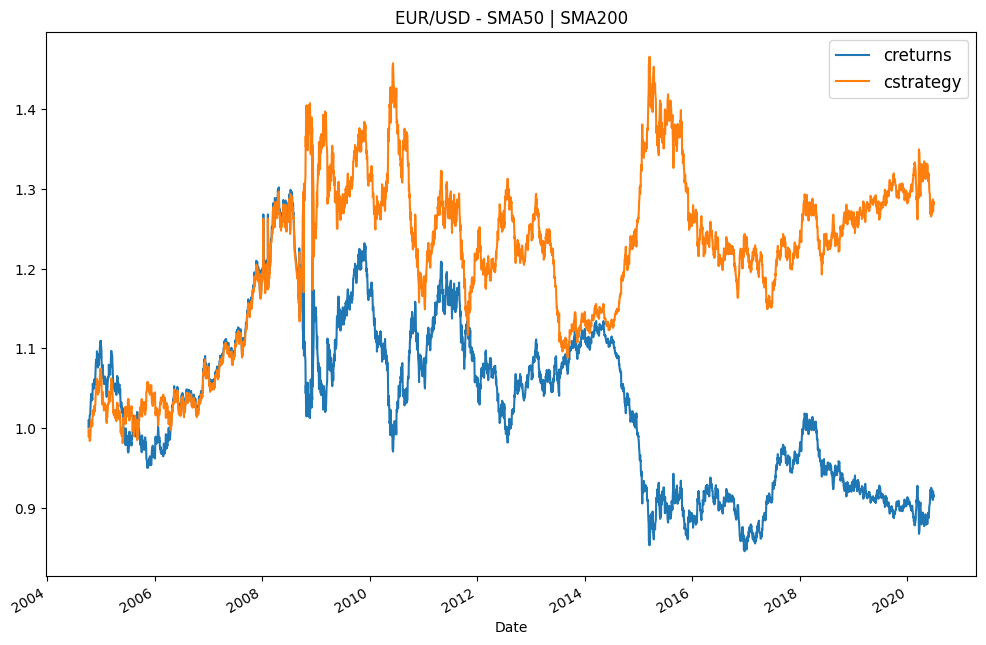

In [28]:
data[["creturns","cstrategy"]].plot(figsize = (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l))
plt.legend(fontsize=12)
plt.show()

In [29]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

np.float64(0.3676743925451291)

In [36]:
df=pd.read_csv("eurusd.csv",parse_dates=["Date"], index_col="Date")

In [37]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [42]:
def test_strategy(SMA):
  data = df.copy()
  data["returns"] = np.log(data.price.div(data.price.shift(1)))
  data["SMA_S"]=data.price.rolling(int(SMA[0])).mean()
  data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
  data.dropna(inplace=True)

  data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1 , -1)
  data["srategy"] = data.position.shift(1) * data["returns"]
  data.dropna(inplace= True)

  return np.exp(data["srategy"].sum())

In [43]:
test_strategy((50,200))

np.float64(1.2835003323288487)

In [44]:
test_strategy((75,150))

np.float64(1.58974017632631)

In [45]:
test_strategy((25,252))

np.float64(1.1755957408242586)

In [46]:
SMA_S_range=range(10,50,1)
SMA_L_range=range(100,252,1)

In [47]:
SMA_S_range

range(10, 50)

In [49]:
from itertools import product

In [50]:
list(product(SMA_S_range,SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [51]:
combinations = list(product(SMA_S_range,SMA_L_range))

In [53]:
len(combinations)

6080

In [54]:
(50-10) * (252-100)

6080

In [55]:
results=[]
for comb in combinations:
  results.append(test_strategy(comb))

In [56]:
results

[np.float64(0.919639848594834),
 np.float64(0.9017909001165384),
 np.float64(0.9088514707606253),
 np.float64(0.9172039081156574),
 np.float64(0.9902316124249487),
 np.float64(0.9839526868794093),
 np.float64(1.0304555530676556),
 np.float64(1.0580627844394732),
 np.float64(1.0209474697557395),
 np.float64(1.1225414594776157),
 np.float64(1.1439396770251975),
 np.float64(1.0928826062479924),
 np.float64(1.158686928858328),
 np.float64(1.1472509415077026),
 np.float64(1.0535678507360313),
 np.float64(1.0834788006764182),
 np.float64(1.151663935854727),
 np.float64(1.1505573494996577),
 np.float64(1.1653183679562213),
 np.float64(1.2167014670211942),
 np.float64(1.2416587315963903),
 np.float64(1.1667630873747963),
 np.float64(1.2185865782849303),
 np.float64(1.1718965787619908),
 np.float64(1.1816366630339725),
 np.float64(1.13721357858156),
 np.float64(1.1858141820530623),
 np.float64(1.266796025009642),
 np.float64(1.2954797436418617),
 np.float64(1.2487089215312812),
 np.float64(1.27

In [57]:
np.max(results)

np.float64(2.5266939897810787)

In [58]:
np.argmax(results)

np.int64(5509)

In [59]:
combinations[np.argmax(results)]

(46, 137)

In [60]:
many_results=pd.DataFrame(data=combinations,columns=["SMA_S","SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [61]:
many_results["performance"] = results

In [62]:
many_results

,SMA_S,SMA_L,performance
0,10,100,0.919640
1,10,101,0.901791
2,10,102,0.908851
3,10,103,0.917204
4,10,104,0.990232
...,...,...,...
6075,49,247,1.282403
6076,49,248,1.303129
6077,49,249,1.267525
6078,49,250,1.275176


In [64]:
many_results.nlargest(10,"performance")

,SMA_S,SMA_L,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


In [65]:
many_results.nsmallest(10,"performance")

,SMA_S,SMA_L,performance
461,13,105,0.835621
310,12,106,0.837311
309,12,105,0.846303
159,11,107,0.849825
307,12,103,0.851647
308,12,104,0.852194
608,14,100,0.865872
306,12,102,0.871889
462,13,106,0.876600
458,13,102,0.876784
